In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preparing Dataset

In [9]:
df = pd.read_csv("C:/Users/AKINDILENI DAYO/Downloads/FoodBalanceSheets_E_Africa_NOFLAG.csv", encoding='latin-1')
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [10]:
df.shape

(60943, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60943 entries, 0 to 60942
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     60943 non-null  int64  
 1   Area          60943 non-null  object 
 2   Item Code     60943 non-null  int64  
 3   Item          60943 non-null  object 
 4   Element Code  60943 non-null  int64  
 5   Element       60943 non-null  object 
 6   Unit          60943 non-null  object 
 7   Y2014         59354 non-null  float64
 8   Y2015         59395 non-null  float64
 9   Y2016         59408 non-null  float64
 10  Y2017         59437 non-null  float64
 11  Y2018         59507 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 5.6+ MB


There are null values present in the dataset.

## Codes for the answers to the Quiz

## Q11

In [40]:
df[["Y2014", "Y2017"]].groupby(df["Item"]).sum().loc["Animal fats"]

Y2014    209460.54
Y2017    269617.53
Name: Animal fats, dtype: float64

## Q12

In [25]:
df.describe()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
count,60943.000000,60943.000000,60943.000000,59354.000000,59395.000000,59408.000000,59437.000000,59507.000000
mean,134.265576,2687.176706,3814.856456,134.196282,135.235966,136.555222,140.917765,143.758381
std,72.605709,146.055739,2212.007033,1567.663696,1603.403984,1640.007194,1671.862359,1710.782658
min,4.000000,2501.000000,511.000000,-1796.000000,-3161.000000,-3225.000000,-1582.000000,-3396.000000
25%,74.000000,2562.000000,684.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,136.000000,2630.000000,5142.000000,0.090000,0.080000,0.080000,0.100000,0.070000
75%,195.000000,2775.000000,5511.000000,8.340000,8.460000,8.430000,9.000000,9.000000
max,276.000000,2961.000000,5911.000000,176405.000000,181137.000000,185960.000000,190873.000000,195875.000000


## Q13

In [26]:
df.isna().sum()

Area Code          0
Area               0
Item Code          0
Item               0
Element Code       0
Element            0
Unit               0
Y2014           1589
Y2015           1548
Y2016           1535
Y2017           1506
Y2018           1436
dtype: int64

In [32]:
(df.isna().sum() / len(df)) * 100

Area Code       0.000000
Area            0.000000
Item Code       0.000000
Item            0.000000
Element Code    0.000000
Element         0.000000
Unit            0.000000
Y2014           2.607354
Y2015           2.540078
Y2016           2.518747
Y2017           2.471162
Y2018           2.356300
dtype: float64

## Q14

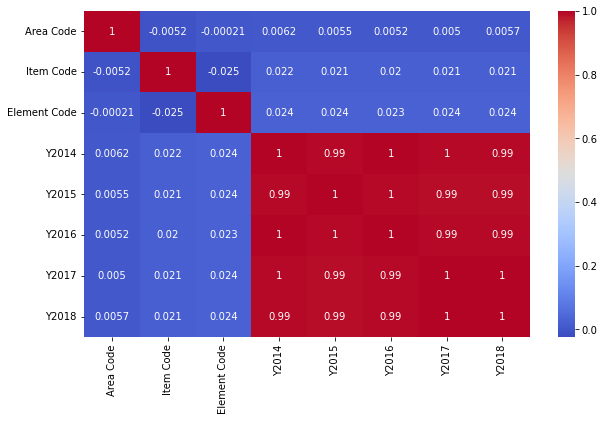

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm");

## Q15

In [51]:
df[["Y2014", "Y2015", "Y2016", "Y2017", "Y2018"]].groupby(df["Element"]).sum().loc["Import Quantity"]

Y2014    274144.48
Y2015    267018.46
Y2016    286582.78
Y2017    294559.09
Y2018    287997.09
Name: Import Quantity, dtype: float64

## Q16

In [54]:
df["Y2014"].groupby(df["Element"]).sum().loc["Production"]

1931287.75

## Q17 & Q18

In [72]:
df[["Y2018", "Element"]].groupby(df["Element"]).sum().sort_values("Y2018")

,Y2018
Element,
Tourist consumption,90.00
Fat supply quantity (g/capita/day),10258.69
Protein supply quantity (g/capita/day),11833.56
Stock Variation,20577.91
Seed,25263.14
Residuals,34864.00
Food supply quantity (kg/capita/yr),49056.85
Other uses (non-food),91300.97
Losses,163902.00


## Q19

In [77]:
mask = (df["Element"] == "Import Quantity") & (df["Area"] == "Algeria")
df[mask]["Y2018"].sum()

36238.29

## Q20

In [78]:
df["Area"].nunique()

49